### Test Lindbladian invariance properties

In [1]:
using QuantumOptics
using LinearAlgebra

include("LiPoSID.jl")

Main.LiPoSID

In [2]:
function Lindblad_time_evolution(basis, ρ₀, time_span, H, J)
         
    ρ₀ = DenseOperator(basis, Hermitian(ρ₀)) 
    H = DenseOperator(basis, H) # reconstructed Hamiltonian of the system
    #H = DenseOperator(basis, convert(Matrix{ComplexF64}, H[:,:,1]) ) # !!!!!!
    J = [ DenseOperator(basis, Jᵢ) for Jᵢ in J ] # reconstracted Lindblad decipators
    
    time, ρ  = timeevolution.master(time_span, ρ₀, H, J)
    
    ρ = [ρₜ.data for ρₜ in ρ]

end

Lindblad_time_evolution (generic function with 1 method)

$
     \frac{d\rho}{dt} = - \frac{i}{\hbar}[H, \rho]+\left[L \rho L^\dagger - \frac{1}{2}\left\{ L^\dagger L, \rho \right\} \right]
$

$
L = \sqrt{\gamma} \sigma = \begin{pmatrix} 0 & \sqrt{\gamma} \\ 0 & 0
   \end{pmatrix} = \begin{pmatrix} 0 & a \\ 0 & 0
   \end{pmatrix}$
   



In [3]:
Hᵃⁿᶻ = [ 25.           0
         0             1    ]

γ = 0.079477

Lᵃⁿᶻ = [ 0    √γ
         0     0. + 0im  ]

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.281917+0.0im
 0.0+0.0im       0.0+0.0im

In [4]:
Hˢⁱᵈ = [ 23.9928+0.0im         0.451105-0.0998146im
         0.451105+0.0998146im    0.0+0.0im           ]


Lˢⁱᵈ  = [ 1.60039+2.86072im       -0.21047+0.187527im
          -1.61858e-7+1.33063e-7im  1.60039+2.86072im  ]


2×2 Matrix{ComplexF64}:
     1.60039+2.86072im     -0.21047+0.187527im
 -1.61858e-7+1.33063e-7im   1.60039+2.86072im

$L' = L + a I$

$ a = -\operatorname{tr}(L)/2$

$ H' = H + \frac{1}{2i} (a^*L - a L^\dagger)$

### Lets screw hamiltonian and dissipator

In [5]:
a = 10. + 2im
Hˢ = Hᵃⁿᶻ + (a' * Lᵃⁿᶻ - a * Lᵃⁿᶻ')/2im

2×2 Matrix{ComplexF64}:
      25.0-0.0im      -0.281917-1.40958im
 -0.281917+1.40958im        1.0-0.0im

In [6]:
Lˢ = Lᵃⁿᶻ + I * a

2×2 Matrix{ComplexF64}:
 10.0+2.0im  0.281917+0.0im
  0.0+0.0im      10.0+2.0im

### Now fit it back

In [7]:
function fix_hamiltonian_and_dissipator(H, L)
    a = - tr(L)/2
    Lᶠⁱˣᵉᵈ = L + I * a
    Hᶠⁱˣᵉᵈ = H + (a' * L - a * L')/2im
    return Hᶠⁱˣᵉᵈ, Lᶠⁱˣᵉᵈ
end

fix_hamiltonian_and_dissipator (generic function with 1 method)

In [8]:
Hᶠⁱˣ, Lᶠⁱˣ = fix_hamiltonian_and_dissipator(Hˢ, Lˢ)
Hᶠⁱˣ

2×2 Matrix{ComplexF64}:
 25.0-0.0im  0.0+0.0im
  0.0+0.0im  1.0-0.0im

In [9]:
Lᶠⁱˣ

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.281917+0.0im
 0.0+0.0im       0.0+0.0im

In [10]:
Hˢⁱᵈᶠⁱˣ, Lˢⁱᵈᶠⁱˣ = fix_hamiltonian_and_dissipator(Hˢⁱᵈ, Lˢⁱᵈ)
Hˢⁱᵈᶠⁱˣ

2×2 Matrix{ComplexF64}:
     23.9928+0.0im        -1.37496e-6-5.8274e-7im
 -1.37496e-6+5.8274e-7im          0.0+0.0im

In [11]:
Lˢⁱᵈᶠⁱˣ

2×2 Matrix{ComplexF64}:
         0.0+0.0im         -0.21047+0.187527im
 -1.61858e-7+1.33063e-7im       0.0+0.0im

### Consider dynamics

In [12]:
using QuantumOptics

basis = NLevelBasis(2)

NLevel(N=2)

In [13]:
# Initial states

Ψᵍ₀ = [1.
       0im]
Ψᵉ₀ = [0im
       1.]
ρᵍ₀ = Ψᵍ₀ * Ψᵍ₀' 
ρᵉ₀ = Ψᵉ₀ * Ψᵉ₀' 
ρˣ₀ = [1.  1 + 0im
       1   1]/2 
ρʸ₀ = [1. -1im
       1im  1]/2

# Time span 

t₀ = 0.06
Δt = 0.020000000000000004
n = 1256
t = range(t₀, n*Δt, n)
t = convert(Vector{Float64}, t)

@assert maximum(diff(t)) ≈ minimum(diff(t)) ≈ t[2]-t[1]

In [14]:
ρ₀ = ρˣ₀

ρᵃⁿᶻ = Lindblad_time_evolution(basis, ρ₀, t, Hᵃⁿᶻ, [Lᵃⁿᶻ])

ρˢ = Lindblad_time_evolution(basis, ρ₀, t, Hˢ, [Lˢ])

ρᶠⁱˣ = Lindblad_time_evolution(basis, ρ₀, t, Hᶠⁱˣ, [Lᶠⁱˣ])

ρˢⁱᵈ = Lindblad_time_evolution(basis, ρ₀, t, Hˢⁱᵈ, [Lˢⁱᵈ]);

ρˢⁱᵈᶠⁱˣ = Lindblad_time_evolution(basis, ρ₀, t, Hˢⁱᵈᶠⁱˣ, [Lˢⁱᵈᶠⁱˣ]);

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase C:\Users\Zakhar\.julia\packages\SciMLBase\VKnrY\src\retcodes.jl:360
┌ Warning: Backwards compatability support of the new return codes to 

In [15]:
using Plots

In [16]:
fˢ = LiPoSID.fidelity_series(basis, ρᵃⁿᶻ, ρˢ )
fᶠⁱˣ = LiPoSID.fidelity_series(basis, ρᵃⁿᶻ, ρᶠⁱˣ)
fˢⁱᵈᵃⁿᶻ = LiPoSID.fidelity_series(basis, ρᵃⁿᶻ, ρˢⁱᵈ);
fˢⁱᵈᶠⁱˣ = LiPoSID.fidelity_series(basis, ρˢⁱᵈ, ρˢⁱᵈᶠⁱˣ);

In [17]:
minimum(fˢ)

0.999999999999668

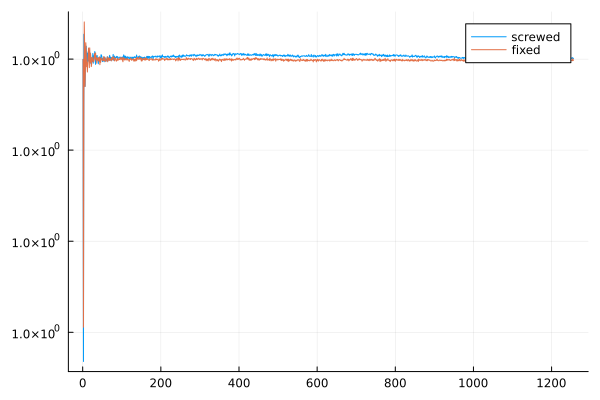

GKS: Possible loss of precision in routine SET_WINDOW


In [18]:
plot(fˢ, label = "screwed")
plot!(fᶠⁱˣ, label ="fixed")

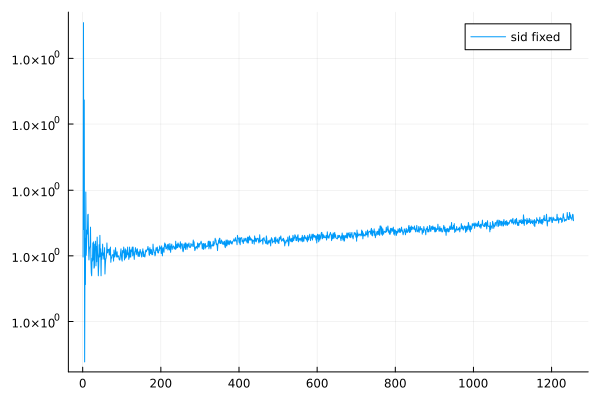

In [19]:
plot(fˢⁱᵈᶠⁱˣ, label ="sid fixed")

In [20]:
minimum(fˢⁱᵈᶠⁱˣ)

0.9999999999999678

In [21]:
bᵃⁿᶻ = LiPoSID.bloch(ρᵃⁿᶻ)
bˢ = LiPoSID.bloch(ρˢ)
bᶠⁱˣ = LiPoSID.bloch(ρᶠⁱˣ)
bˢⁱᵈ = LiPoSID.bloch(ρˢⁱᵈ)
bˢⁱᵈᶠⁱˣ = LiPoSID.bloch(ρˢⁱᵈᶠⁱˣ)

3×1256 Matrix{Float64}:
 1.0  0.88671     0.574096    0.132809    …  -0.357836   -0.273937  -0.128537
 0.0  0.460607    0.816851    0.988743       -0.0941359  -0.248293  -0.346341
 0.0  0.00158545  0.00316838  0.00474878      0.863057    0.863275   0.863491

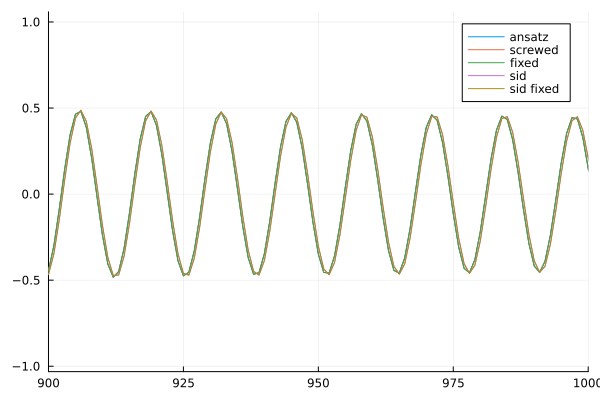

In [22]:
bv = 1

plot(bᵃⁿᶻ[bv,:], label="ansatz") 
plot!(bˢ[bv,:], label="screwed")
plot!(bᶠⁱˣ[bv,:], label="fixed") 
plot!(bˢⁱᵈ[bv,:], label="sid")
plot!(bˢⁱᵈᶠⁱˣ[bv,:], label="sid fixed") 

xlims!(900, 1000)
#ylims!(0,0.5)